# Lecture 22

Mid-term Exam is next week. Exam will be posted on github on Wednesday during lecture... due Friday by end of lab session. It will be very similar to the labs.
    


## Solve some problems together

1. What is the output of the following cell?


In [1]:
my_list=[1,2,3,4,5,4,3,2,1]

def arg_max(d):
    a_max=d[0]
    i_max=0
    for i,e in enumerate(d):
        if e>a_max:
            a_max=e
            i_max=i
    return i_max

print(max(my_list),arg_max(my_list))

5 4


In [2]:
def arg_min(d):
    a_min=d[0]
    i_min=0
    for i,e in enumerate(d):
        if e<a_min:
            a_min=e
            i_min=i
    return i_min

print(min(my_list),arg_min(my_list))

1 0


2. What would be `arg_min(my_list)` return if it was modified to return a list of the indexes of all values that are max. 

3. Do the modification:

In [7]:
def arg_min(lst):
    out=list()
    
    min_val=lst[0]
    min_index=0
    for i,val in enumerate(lst):
        if val<min_val:
            min_val=val
            min_index=i
            out=list()
            out.append(i)
        elif val==min_val:
            out.append(i)
            
    return out


In [8]:
arg_min([2,2,1,2,3,1,1])

[2, 5, 6]

# Histograms

In [9]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [10]:
# Quickly make a list of 100 numbers between 5 and 15.
data_0=(10*np.random.random(100)+5.).tolist()

In [11]:
# Or a normal distribution at 10 with sigma 2.5
data_1=np.random.normal(10,2.5,100)

In [12]:
np.histogram(data_0,bins=1)

(array([100]), array([ 5.023388  , 14.95310792]))

In [14]:
print(min(data_0),max(data_0))

5.023387998644145 14.953107918398752


In [15]:
np.histogram(data_0,bins=2)

(array([53, 47]), array([ 5.023388  ,  9.98824796, 14.95310792]))

In [16]:
np.histogram(data_0,bins=3)

(array([40, 29, 31]),
 array([ 5.023388  ,  8.33329464, 11.64320128, 14.95310792]))

(array([40., 29., 31.]),
 array([ 5.023388  ,  8.33329464, 11.64320128, 14.95310792]),
 <a list of 3 Patch objects>)

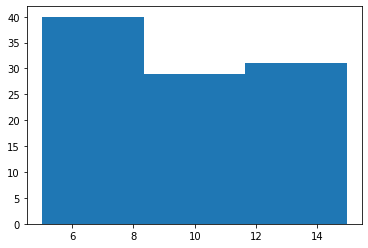

In [17]:
plt.hist(data_0,bins=3)

(array([ 1.,  2.,  9., 13., 18., 25., 11., 10.,  7.,  4.]),
 array([ 3.02391272,  4.34738261,  5.6708525 ,  6.99432239,  8.31779229,
         9.64126218, 10.96473207, 12.28820196, 13.61167185, 14.93514174,
        16.25861163]),
 <a list of 10 Patch objects>)

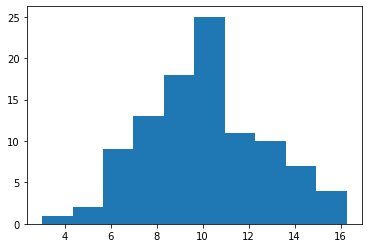

In [18]:
plt.hist(data_1)

In [19]:
np.mean(data_1)

10.085045486397426

In [20]:
np.std(data_1)

2.608483858650019

## Histogram

In Lab 4 you are asked to write a histogram function:

* User inputs a list of values `x` and optionally `n_bins` which defaults to 10.
* If not supplied, find the minimum and maximum (`x_min`,`x_max`) of the values in x.
* Determine the bin size (`bin_size`) by dividing the range of the function by the number of bins.
* Create an empty list of zeros of size `n_bins`, call it `hist`.
* Loop over the values in `x`
    * Loop over the values in `hist` with index `i`:
        * If x is between `x_min+i*bin_size` and `x_min+(i+1)*bin_size`, increment `hist[i].` 
        * For efficiency, try to use continue to goto the next bin and data point.
* Return `hist` and the list corresponding of the bin edges (i.e. of `x_min+i*bin_size`).    





## Alternative
* User inputs a list of values `x` and optionally `n_bins` which defaults to 10.
* If not supplied, find the minimum and maximum (`x_min`,`x_max`) of the values in x.
* Create an empty list of zeros of size `n_bins`, call it `hist`.
* Create a list of `bin_edges` using `arange`.
* Append the `x_max` to bin_edges.
* Loop over the values in `x`
    * Loop over the values in `hist` with index `i`:
        * If x is between `bin_edge[i]` and `bin_edge[i+1]`, increment `hist[i].` 
        * For efficiency, try to use continue to goto the next bin and data point.
* Return `hist` and the list corresponding of the bin edges (i.e. of `x_min+i*bin_size`).    



In [ ]:
def arange(x_min,x_max,steps=10):
    step_size=(x_max-x_min)/steps
    x=x_min
    out = list()
    for i in range(steps):
        out.append(x)
        x+=step_size
    return out

In [ ]:
def histogram(data, n_bins=10,x_min=None, x_max=None):
    if x_min==None:
        x_min=min(data)
    if x_max==None:
        x_max=max(data)
        
    bin_edges = arange(x_min,x_max,n_bins)
    bin_edges.append(x_max)

    hist=[0]*n_bins
    
    for d in data:
        for i,(low_edge,high_edge) in enumerate(zip(bin_edges[:-1],bin_edges[1:])):
            if d>=low_edge and d<high_edge:
                hist[i]+=1
                break
                
    return hist,bin_edges

In [ ]:
histogram(data_0,10,0,10)

In [ ]:
np.histogram(data_0,range=(0,10),bins=10)